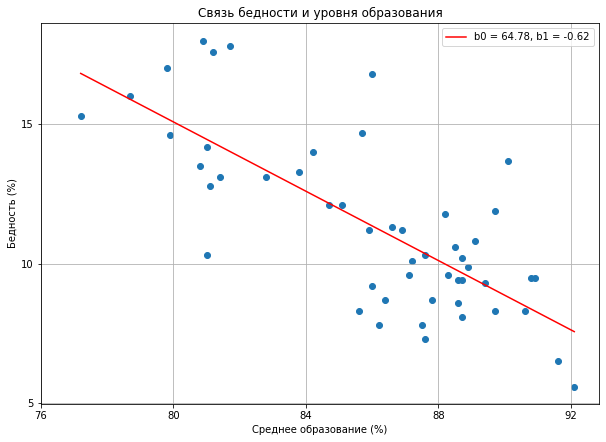

             Estimate  Std.Error  t value      Pr(>|t|)
(Intercept)   64.7810     6.8026     9.52  9.940660e-13
hs_grand      -0.6212     0.0790    -7.86  3.108830e-10

Multiple R-squared: 0.5578,
F-statistic(1,49) = 61.81, p-value = 3.10882981031842e-10


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

data=pd.read_csv(r'D:\DataSets\Stepik Courses Data\states.csv')

# рассчет ковариационной матрицы двух векторов, на выходе ковариация и дисперсии каждого из массивов, 
# или можно рассчитать вручную по формулам из уроков cov - урок 3_1 третье видео; D - урок 1_5 третье видео
X = data['hs_grad']
Y = data['poverty']
ssxm, ssxym, ssyxm, ssym = np.cov(X,Y).flat

# рассчет корреляции по формуле из урока 3_1 третье видео: r = cov/stdx*stdy, 
# т. к. в ковариационной матрице у нас дисперсии, то в знаменателе нужно взять квадратный корень 
if ssxm == 0 or ssym == 0:
    r = 0
else:
    r = ssxym / (ssxm * ssym)**0.5
    
# расчет slope и intercept из урока 3_3 второе видео: slope = (stdy/stdx) * r
slope = r * (ssym/ssxm)**0.5
intercept = np.mean(Y) - slope * np.mean(X)

df = len(X) - 2
# рассчет t - значения, вероятности p и стандартной ошибки для X параметра подсмотренно тут: 
# https://github.com/scipy/scipy/blob/v1.4.1/scipy/stats/_stats_mstats_common.py#L15-L144
tx = r * np.sqrt(df / ((1.0 - r)*(1.0 + r)))
sterrestx = np.sqrt((1 - r**2) * ssym / ssxm / df)
px = 2 * stats.t.sf(np.abs(tx), df)

# Находим сумму квадратов по параметру X
s = [i**2 for i in X]
sterresty = (sterrestx**2/51*sum(s))**0.5

# рассчет t - значения, вероятности p и стандартной ошибки для Y параметра подсмотренно тут: 
# https://en.wikipedia.org/wiki/Simple_linear_regression
ty = intercept/sterresty
py = 2 * stats.t.sf(np.abs(ty), df)

# рассчет F-статистики подсмотренно тут:
# https://www.chem-astu.ru/science/reference/fischer.html
F = r**2/(1-r**2)*df
p_val = stats.f.sf(F, 1, df)

# создаем таблицу как в лекции
ttlinear = pd.DataFrame(data = {
    'Estimate':[round(num, 4) for num in [intercept,slope]], 'Std.Error':[round(num, 4) for num in [sterresty, sterrestx]], 
    't value':[round(num, 2) for num in [ty,tx]], 'Pr(>|t|)':[py,px]}, 
                        index = ['(Intercept)','hs_grand'])

# вычисляем остатки
#residuals = Y - intercept - slope*X

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# точечный график
ax1.scatter(X,Y)

# регрессионная прямая
x1=np.linspace(min(X),max(X),51)
y1=intercept + slope*x1
plt.plot(x1,y1,'-r',label='b0 = {}, b1 = {}'.format(round(intercept,2), round(slope,2)))

plt.grid()
plt.title('Связь бедности и уровня образования')
plt.xlabel('Среднее образование (%)')
plt.ylabel('Бедность (%)')
plt.xticks(np.arange(76,93, step=4))
plt.yticks(np.arange(5,18, step=5))
plt.legend(loc='upper right')
plt.show()


print(ttlinear)
print('')
print('Multiple R-squared: {},'.format(round(r**2,4)))
print('F-statistic(1,{}) = {}, p-value = {}'.format(df, round(F,2), p_val))